In [1]:
import numpy as np
import pandas as pd
import scipy

from google.colab import files

In [2]:
files.upload()

Saving signal.txt to signal.txt


{'signal.txt': b'   2.6527342971123682     \r\n   3.4007989905524822     \r\n   3.6678093574769921     \r\n   3.5622189003275357     \r\n   3.2853578161762451     \r\n   3.0467909428563495     \r\n   2.9792797897389400     \r\n   3.0860702503035413     \r\n   3.2407365506705568     \r\n   3.2395889330658552     \r\n   2.8864291589492357     \r\n   2.0769458131232650     \r\n  0.85005871167738212     \r\n -0.61395237094393673     \r\n  -2.0484446788016815     \r\n  -3.1881947452296293     \r\n  -3.8571124117275626     \r\n  -4.0230363356137033     \r\n  -3.7992802757831692     \r\n  -3.3928558207248063     \r\n  -3.0195571682859312     \r\n  -2.8186236566564991     \r\n  -2.7997160411607052     \r\n  -2.8424520383959244     \r\n  -2.7485234568047856     \r\n  -2.3261929617395998     \r\n  -1.4744748939616299     \r\n -0.23431975928827131     \r\n   1.2133547001005498     \r\n   2.6026911725871660     \r\n   3.6706372902911770     \r\n   4.2445552556500470     \r\n   4.2968513436366553  

In [3]:
signal = pd.read_fwf('signal.txt');signal

,2.6527342971123682
0,3.400799
1,3.667809
2,3.562219
3,3.285358
4,3.046791
...,...
493,2.730329
494,1.800430
495,1.101512
496,0.667177


In [4]:
# Transformando em um numpy array:
y = np.array([float(value) for value in signal.values]);y

<ipython-input-4-7b9bdb0c80d5>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = np.array([float(value) for value in signal.values]);y


array([ 3.40079899,  3.66780936,  3.5622189 ,  3.28535782,  3.04679094,
        2.97927979,  3.08607025,  3.24073655,  3.23958893,  2.88642916,
        2.07694581,  0.85005871, -0.61395237, -2.04844468, -3.18819475,
       -3.85711241, -4.02303634, -3.79928028, -3.39285582, -3.01955717,
       -2.81862366, -2.79971604, -2.84245204, -2.74852346, -2.32619296,
       -1.47447489, -0.23431976,  1.2133547 ,  2.60269117,  3.67063729,
        4.24455526,  4.29685134,  3.94630256,  3.40601667,  2.89822388,
        2.56862993,  2.4330815 ,  2.37680431,  2.20625069,  1.73336743,
        0.85959949, -0.37304243, -1.78400177, -3.10918645, -4.08862854,
       -4.55394552, -4.48276524, -3.99980146, -3.32452845, -2.68566654,
       -2.23522322, -1.99485549, -1.85482875, -1.62562194, -1.12200193,
       -0.24689151,  0.95763399,  2.31236982,  3.5559271 ,  4.43226251,
        4.77795096,  4.57637205,  3.9585091 ,  3.15032235,  2.38692256,
        1.82630491,  1.49542354,  1.28889565,  1.02039754,  0.50

In [5]:
duracao = 31.54

Calculo para achar o Sample Rate:

$$\text{Sample Rate}=\frac{\text{Número total de amostras}}{\text{Duração do áudio (Segundos)}}$$

In [6]:
sr = len(y)/duracao; sr

15.789473684210527

In [7]:
# Calcular a FFT do sinal pelo numpy
fft_result = np.fft.fft(y)
fft_magnitude = np.abs(fft_result) # Pegando os resultados em módulo
# Frequências correspondentes
freqs = np.fft.fftfreq(len(fft_result), 1/sr)
# Criar uma série do pandas com as magnitudes da FFT e as frequências correspondentes
fft_series = pd.Series(fft_magnitude, index=freqs)
# Encontrar a frequência com a maior magnitude
max_magnitude = fft_series.max()
max_frequency = fft_series.idxmax()

print(f'\033[1m{max_magnitude}\033[0m,\033[1m{max_frequency}\033[0m')

743.774245708497,0.538998097653773


`fft`: Calcule a Transformada de Fourier Discreta 1-Dimensional (1-D).

`fftfreq`: Retorna as frequências amostrais da Transformada de Fourier Discreta. O array de floats retornado, `f`, contém os centros das faixas de frequência em ciclos por unidade do espaçamento das amostras (com zero no início). Por exemplo, se o espaçamento das amostras estiver em segundos, então a unidade de frequência é ciclos/segundo.

In [8]:
from matplotlib import pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


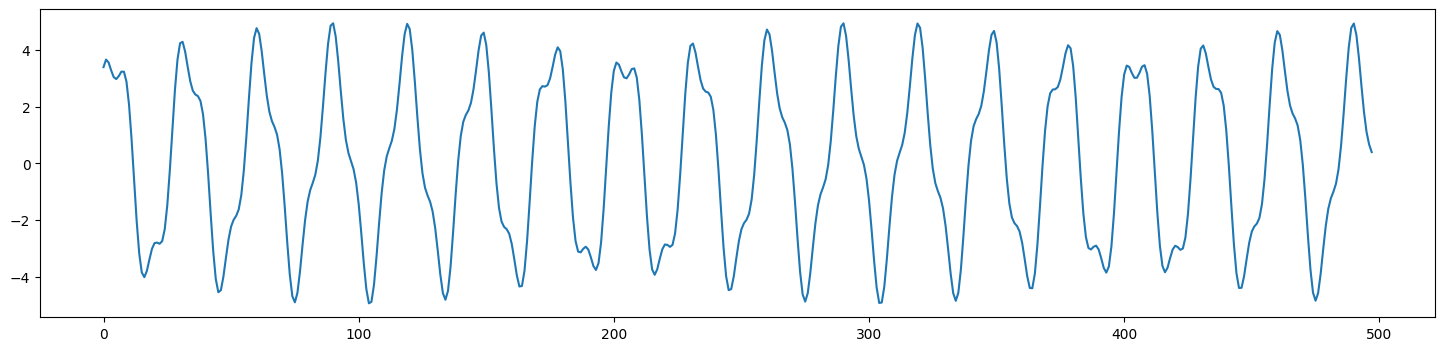

In [17]:
N = len(signal)
# Periodo:
T = 1 / sr # Periodo é o inverso da frequência
#create x-axis for time length of signal
x = np.linspace(0, N*T, N)
#create array that corresponds to values in signal
#perform FFT on signal
yf = np.fft.fft(signal)
#create new x-axis: frequency from signal
xf = np.linspace(0.0, 1.0/(2.0*T) , N//2 )
#plot results
plt.figure(figsize=(18,4))
plt.plot(np.arange(len(y)), yf)
#plt.grid()
plt.show()

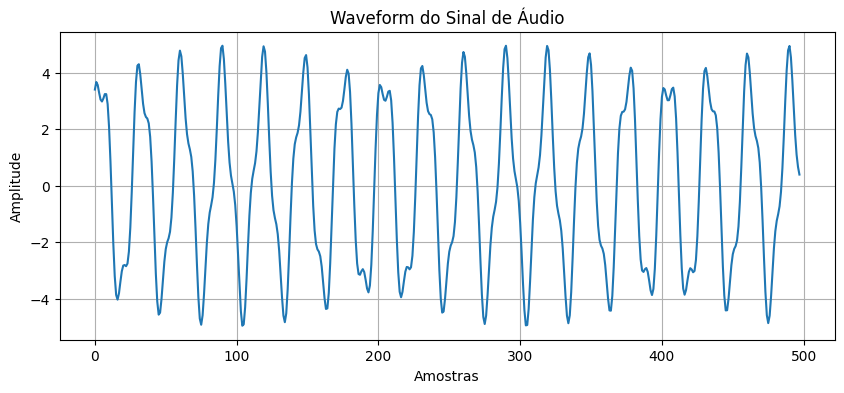

In [10]:
# Plot o waveform
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Waveform do Sinal de Áudio')
plt.grid(True)
plt.show()

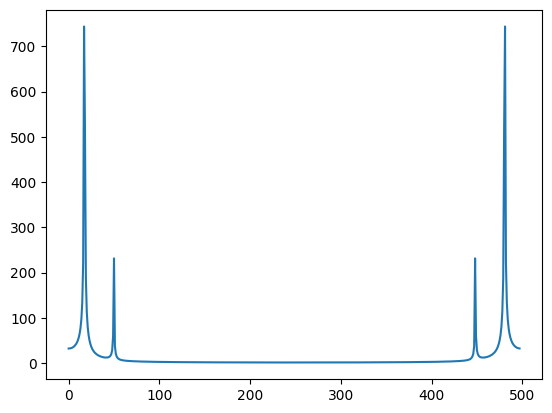

In [15]:
plt.plot(fft_magnitude)

In [12]:
dir(fft_magnitude)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

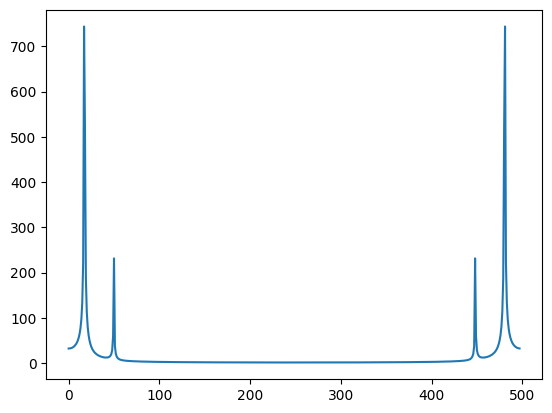

In [13]:
plt.plot(fft_magnitude)